<a href="https://colab.research.google.com/github/ashaoluayanfe/data-science-and-analytics/blob/main/bank_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer  Churn Prediction using Machine Learning**
> This notebook looks into using various Python-based machine and data science libraries in an attempt to build a machine laearning model capable of predicting whether or not a customer will leave a bank base on some featured

>The following approach:

  * Problem definition
  * Data
  * Evaluation
  * Features
  * Modelling
  * Experimentation

## 1. **Problem Definition**
In a statement,

Given clinical parameters about a patient, can we predict whether a bank customer will churn or not

## **2. Data**
> The data can be gotten from:
https://www.kaggle.com/kmalit/bank-customer-churn-prediction/data

## **3. Evaluation**
> If we can reach 85% accuracy at predicting whether or not a bank customer will churn during the proof of concept, we'll pursue the project

## **4. Features**

## **5. Modelling**

### **5.1 Exploratory Data Analysis**

In [ ]:
# import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/ANN/ann_dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


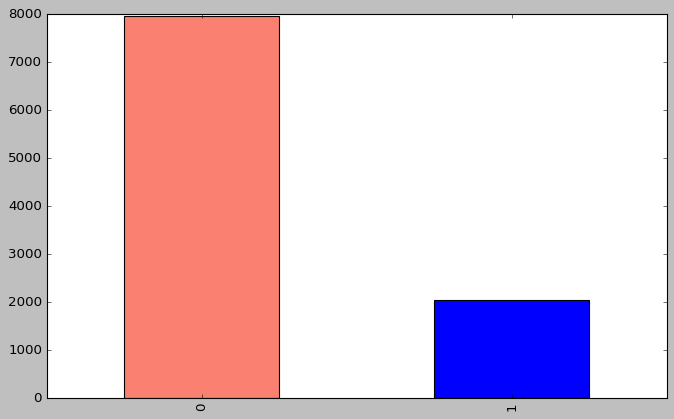

In [ ]:
# Number of classes in the target
plt.style.use('classic')
df['Exited'].value_counts().plot(kind='bar', color=['salmon', 'blue'], figsize=(10,6))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# Check for missing values
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

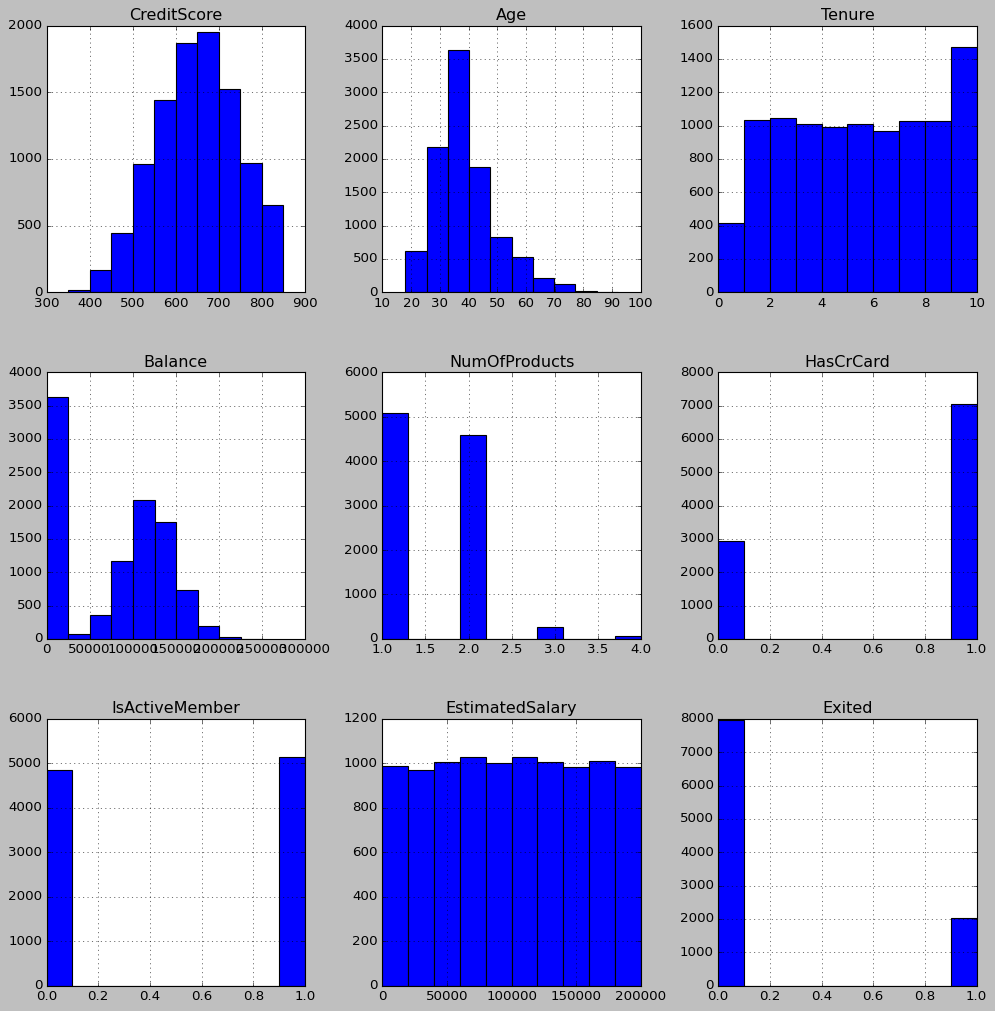

In [ ]:
df.hist(figsize=(15,15));

In [ ]:
# Correlation matrix
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


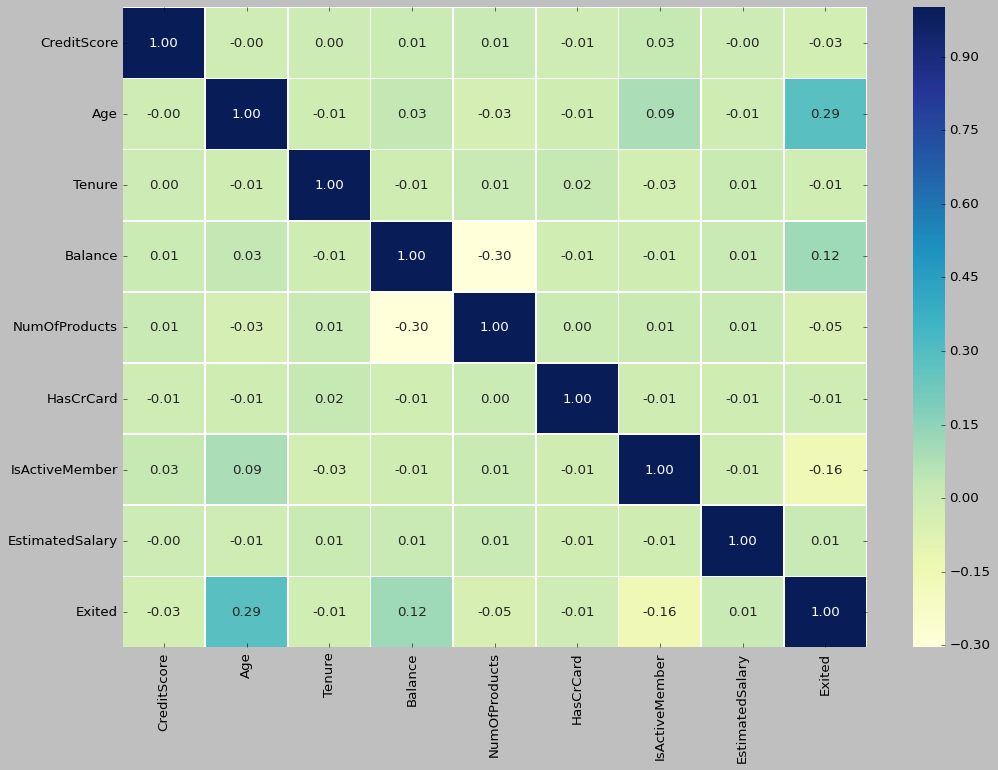

In [ ]:
## Visualizing correlation matrix using seaborn heatmap
corr_matrix= df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

### **5.2 Preparing Data for Machine Learning**

In [ ]:
# Split data into X and y
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender']= le.fit_transform(X['Gender'])

In [ ]:
# Using one hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Geography']
one_hot= OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                                remainder='passthrough')
X_t= transformer.fit_transform(X)

In [ ]:
print(X_t)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2, random_state= 42)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc= sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc.shape, X_test_sc.shape

((8000, 12), (2000, 12))

### **5.3 Building a Machine Learning Model**
> Four models will be used:
* Logistic regression
 * K-Nearest Neighbours classifier
   * Random Forest Classifier
     * CatBoost Classifier

In [ ]:
! pip install catboost

     |████████████████████████████████| 76.3 MB 24 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'catBooost': CatBoostClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  '''''
  Fits and evaluates given machine learning models.
  models: a dict of different Scikit-Learn machine learning models
  X_train_norm: Normalized training data(no labels)
  X_test_norm: Normalized test data(no labels)
  y_train: training labels
  y_test: test labels
  '''''

  # set random seed
  np.random.seed(42)

  # Make a dictionary to keep update scores
  model_scores = {}
  #Loop through models
  for name, model in models.items():
    #Fit the model to the data
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name]= model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores= fit_and_score(models, X_train_sc, X_test_sc, y_train, y_test)

Learning rate set to 0.025035
0:	learn: 0.6721333	total: 50.3ms	remaining: 50.2s
1:	learn: 0.6526666	total: 53.4ms	remaining: 26.7s
2:	learn: 0.6337810	total: 56.7ms	remaining: 18.8s
3:	learn: 0.6169213	total: 59.9ms	remaining: 14.9s
4:	learn: 0.6011406	total: 63.3ms	remaining: 12.6s
5:	learn: 0.5866775	total: 66.4ms	remaining: 11s
6:	learn: 0.5758969	total: 70ms	remaining: 9.92s
7:	learn: 0.5623277	total: 73.4ms	remaining: 9.11s
8:	learn: 0.5493161	total: 76.9ms	remaining: 8.46s
9:	learn: 0.5378766	total: 80.4ms	remaining: 7.96s
10:	learn: 0.5270623	total: 84.6ms	remaining: 7.61s
11:	learn: 0.5173556	total: 88ms	remaining: 7.25s
12:	learn: 0.5076431	total: 91.3ms	remaining: 6.93s
13:	learn: 0.4984501	total: 95ms	remaining: 6.69s
14:	learn: 0.4897844	total: 98.4ms	remaining: 6.46s
15:	learn: 0.4812581	total: 102ms	remaining: 6.25s
16:	learn: 0.4755457	total: 105ms	remaining: 6.08s
17:	learn: 0.4679560	total: 109ms	remaining: 5.93s
18:	learn: 0.4622932	total: 112ms	remaining: 5.79s
19:	

In [ ]:
model_scores

{'KNN': 0.83,
 'Logistic Regression': 0.811,
 'Random Forest': 0.865,
 'catBooost': 0.868}

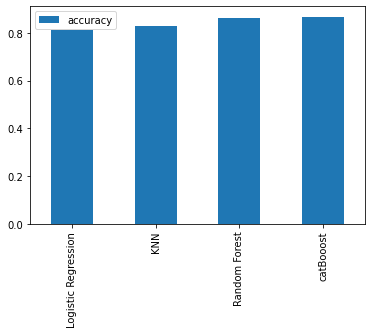

In [ ]:
# Model Comparison
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

**Things to consider**

* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under the curve (AUC)

### **5.4 Hyperparamter Tuning using GridSearchCV**

In [ ]:
# Different hyperparameters for CatBoostClassifier model
grid = {'learning_rate': [0.01, 0.03],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
# Setup grid hyperparameter search for CatBoostClassifier
cb  = GridSearchCV(CatBoostClassifier(),
                          param_grid=grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
cb.fit(X_train_sc, y_train) 

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6685535	total: 5.12ms	remaining: 5.12s
1:	learn: 0.6468628	total: 13.6ms	remaining: 6.79s
2:	learn: 0.6255595	total: 26.7ms	remaining: 8.87s
3:	learn: 0.6052870	total: 40.1ms	remaining: 9.99s
4:	learn: 0.5873817	total: 53.4ms	remaining: 10.6s
5:	learn: 0.5719182	total: 57.4ms	remaining: 9.5s
6:	learn: 0.5578599	total: 59.4ms	remaining: 8.43s
7:	learn: 0.5448372	total: 61.7ms	remaining: 7.65s
8:	learn: 0.5309055	total: 76.3ms	remaining: 8.4s
9:	learn: 0.5181876	total: 95ms	remaining: 9.41s
10:	learn: 0.5062206	total: 109ms	remaining: 9.82s
11:	learn: 0.4943484	total: 123ms	remaining: 10.1s
12:	learn: 0.4819255	total: 136ms	remaining: 10.3s
13:	learn: 0.4716174	total: 150ms	remaining: 10.5s
14:	learn: 0.4624770	total: 155ms	remaining: 10.2s
15:	learn: 0.4544485	total: 168ms	remaining: 10.3s
16:	learn: 0.4460244	total: 182ms	remaining: 10.5s
17:	learn: 0.4376935	total: 195ms	remaining: 10.6s
18:	learn: 0.4304881	total: 215ms	r

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd10882bcd0>,
             param_grid={'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.03]},
             verbose=True)

In [ ]:
cb.best_params_

{'depth': 6, 'l2_leaf_reg': 9, 'learning_rate': 0.01}

In [ ]:
# Evaluate the grid search catboostclassifier model
cb.score(X_test_sc, y_test)

0.867

In [ ]:
y_preds = cb.predict(X_test_sc)
y_preds

array([0, 0, 0, ..., 1, 0, 0])

### **ROC AND AUC**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


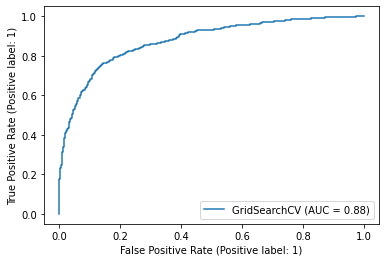

In [ ]:
# Import ROC curve and calculate AUC metric
plot_roc_curve(cb, X_test_sc, y_test);

### **Confusion Matrix**

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1541   66]
 [ 200  193]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


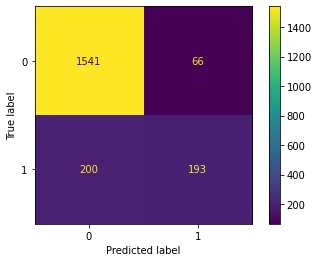

In [ ]:
# Plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cb, X_test_sc, y_test)

### **Classification Report**

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



### **Evaluating Metrics using Cross Evaluation**

In [ ]:
# standardise the whole data
X_sc= sc.transform(X_t)
X_sc.shape


(10000, 12)

In [ ]:
# Cross-validated accuracy
cv_acc= cross_val_score(cb,
                        X_sc,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc= np.mean(cv_acc)
cv_acc

Streaming output truncated to the last 5000 lines.
1:	learn: 0.6760680	total: 11ms	remaining: 5.48s
2:	learn: 0.6676062	total: 15.5ms	remaining: 5.14s
3:	learn: 0.6596897	total: 18.4ms	remaining: 4.58s
4:	learn: 0.6521127	total: 21.3ms	remaining: 4.23s
5:	learn: 0.6447482	total: 24.2ms	remaining: 4.01s
6:	learn: 0.6384192	total: 27.3ms	remaining: 3.87s
7:	learn: 0.6311802	total: 30.3ms	remaining: 3.75s
8:	learn: 0.6239719	total: 33.3ms	remaining: 3.66s
9:	learn: 0.6175510	total: 36.3ms	remaining: 3.59s
10:	learn: 0.6111888	total: 39.3ms	remaining: 3.53s
11:	learn: 0.6050497	total: 42.3ms	remaining: 3.48s
12:	learn: 0.5987235	total: 45.2ms	remaining: 3.43s
13:	learn: 0.5925331	total: 48.3ms	remaining: 3.4s
14:	learn: 0.5865098	total: 51.2ms	remaining: 3.36s
15:	learn: 0.5806092	total: 54.1ms	remaining: 3.33s
16:	learn: 0.5753795	total: 57ms	remaining: 3.3s
17:	learn: 0.5708694	total: 59.2ms	remaining: 3.23s
18:	learn: 0.5657983	total: 61.8ms	remaining: 3.19s
19:	learn: 0.5598653	total: 

KeyboardInterrupt: ignored

In [ ]:
# Cross-validated precision
cv_precision= cross_val_score(cb,
                        X_sc,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision= np.mean(cv_precision)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 0.6854182	total: 2.25ms	remaining: 2.25s
1:	learn: 0.6786293	total: 4.34ms	remaining: 2.17s
2:	learn: 0.6724974	total: 6.45ms	remaining: 2.14s
3:	learn: 0.6652982	total: 8.41ms	remaining: 2.1s
4:	learn: 0.6589772	total: 10.4ms	remaining: 2.08s
5:	learn: 0.6517197	total: 12.7ms	remaining: 2.1s
6:	learn: 0.6447766	total: 14.9ms	remaining: 2.11s
7:	learn: 0.6382253	total: 17.4ms	remaining: 2.15s
8:	learn: 0.6328368	total: 19.9ms	remaining: 2.2s
9:	learn: 0.6269411	total: 22.5ms	remaining: 2.23s
10:	learn: 0.6217825	total: 24.6ms	remaining: 2.21s
11:	learn: 0.6159222	total: 26.7ms	remaining: 2.2s
12:	learn: 0.6099291	total: 28.9ms	remaining: 2.2s
13:	learn: 0.6040499	total: 31.3ms	remaining: 2.2s
14:	learn: 0.5981890	total: 33.5ms	remaining: 2.2s
15:	learn: 0.5928405	total: 36ms	remaining: 2.21s
16:	learn: 0.5884540	total: 38.2ms	remaining: 2.21s
17:	learn: 0.5830048	total: 40.5ms	remaining: 2.21s
18:	learn: 0.5779626	

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Streaming output truncated to the last 5000 lines.
912:	learn: 0.2929585	total: 2.99s	remaining: 285ms
913:	learn: 0.2929161	total: 2.99s	remaining: 282ms
914:	learn: 0.2928803	total: 3s	remaining: 278ms
915:	learn: 0.2928311	total: 3s	remaining: 275ms
916:	learn: 0.2928080	total: 3s	remaining: 272ms
917:	learn: 0.2927681	total: 3s	remaining: 268ms
918:	learn: 0.2927297	total: 3.01s	remaining: 265ms
919:	learn: 0.2926752	total: 3.01s	remaining: 262ms
920:	learn: 0.2926022	total: 3.01s	remaining: 258ms
921:	learn: 0.2925476	total: 3.02s	remaining: 255ms
922:	learn: 0.2925236	total: 3.02s	remaining: 252ms
923:	learn: 0.2924700	total: 3.02s	remaining: 249ms
924:	learn: 0.2924155	total: 3.02s	remaining: 245ms
925:	learn: 0.2923722	total: 3.03s	remaining: 242ms
926:	learn: 0.2923388	total: 3.03s	remaining: 239ms
927:	learn: 0.2923083	total: 3.03s	remaining: 235ms
928:	learn: 0.2922675	total: 3.04s	remaining: 232ms
929:	learn: 0.2922398	total: 3.04s	remaining: 229ms
930:	learn: 0.2921928	tot

KeyboardInterrupt: ignored

In [ ]:
cv_precision

0.7627655963906399

In [ ]:
# Cross-validated recall
cv_recall= cross_val_score(cb,
                        X_sc,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6005618	total: 16.4ms	remaining: 3.27s
5:	learn: 0.5849911	total: 19.6ms	remaining: 3.24s
6:	learn: 0.5741974	total: 22.8ms	remaining: 3.23s
7:	learn: 0.5599791	total: 26.1ms	remaining: 3.23s
8:	learn: 0.5468468	total: 29.3ms	remaining: 3.23s
9:	learn: 0.5359460	total: 32.4ms	remaining: 3.21s
10:	learn: 0.5258263	total: 35.8ms	remaining: 3.22s
11:	learn: 0.5162385	total: 39ms	remaining: 3.21s
12:	learn: 0.5072520	total: 42.3ms	remaining: 3.21s
13:	learn: 0.4980746	total: 46.3ms	remaining: 3.26s
14:	learn: 0.4893032	total: 49.5ms	remaining: 3.25s
15:	learn: 0.4807390	total: 52.7ms	remaining: 3.24s
16:	learn: 0.4749721	total: 55.9ms	remaining: 3.23s
17:	learn: 0.4676480	total: 59ms	remaining: 3.22s
18:	learn: 0.4623669	total: 62.3ms	remaining: 3.21s
19:	learn: 0.4552667	total: 65.6ms	remaining: 3.21s
20:	learn: 0.4495547	total: 68.8ms	remaining: 3.21s
21:	learn: 0.4442677	total: 72.1ms	remaining: 3.2s
22:	learn: 0.4398568	tot

0.4948390904273257

In [ ]:
# Cross-validated f1-score
cv_f1= cross_val_score(cb,
                        X_sc,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6005618	total: 16.8ms	remaining: 3.34s
5:	learn: 0.5849911	total: 20ms	remaining: 3.31s
6:	learn: 0.5741974	total: 23.1ms	remaining: 3.28s
7:	learn: 0.5599791	total: 26.5ms	remaining: 3.29s
8:	learn: 0.5468468	total: 30ms	remaining: 3.3s
9:	learn: 0.5359460	total: 33.3ms	remaining: 3.3s
10:	learn: 0.5258263	total: 36.8ms	remaining: 3.31s
11:	learn: 0.5162385	total: 40.2ms	remaining: 3.31s
12:	learn: 0.5072520	total: 43.5ms	remaining: 3.3s
13:	learn: 0.4980746	total: 46.8ms	remaining: 3.3s
14:	learn: 0.4893032	total: 50.2ms	remaining: 3.3s
15:	learn: 0.4807390	total: 53.6ms	remaining: 3.29s
16:	learn: 0.4749721	total: 56.9ms	remaining: 3.29s
17:	learn: 0.4676480	total: 60.1ms	remaining: 3.28s
18:	learn: 0.4623669	total: 63.5ms	remaining: 3.28s
19:	learn: 0.4552667	total: 69.6ms	remaining: 3.41s
20:	learn: 0.4495547	total: 74ms	remaining: 3.45s
21:	learn: 0.4442677	total: 79ms	remaining: 3.51s
22:	learn: 0.4398568	total: 82.6

0.5997719686558636

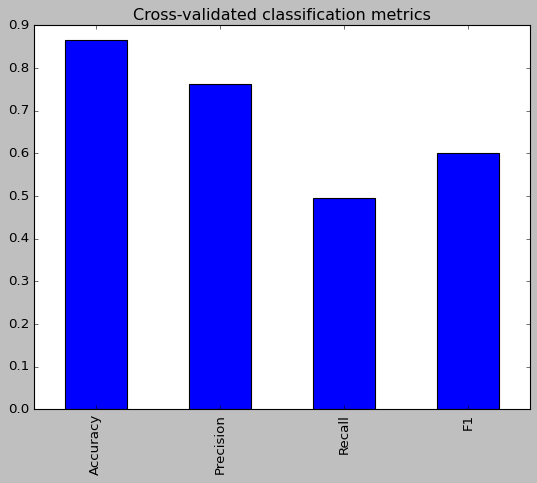

In [ ]:
# Visualise cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall':cv_recall,
                           'F1':cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics',
                      legend=False)